<a href="https://colab.research.google.com/github/abhy-kumar/churn-analysis/blob/main/churnML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Load the dataset
def load_data(filepath):
    """
    Loads the churn dataset from the specified filepath.

    Parameters:
    filepath (str): The path to the CSV file.

    Returns:
    pd.DataFrame: Loaded DataFrame.
    """
    try:
        df = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"File not found at the path: {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [60]:
# Path to your dataset
filepath = '/content/Telco_customer_churn.csv'

# Load the data
df = load_data(filepath)

Data loaded successfully.


In [59]:
def explore_data(df):
    """
    Displays basic information and statistics about the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to explore.
    """
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())

In [61]:
explore_data(df)

First 5 rows of the dataset:
   CustomerID  Count        Country       State         City  Zip Code                Lat Long  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003  33.964131, -118.272783   
1  9237-HQITU      1  United States  California  Los Angeles     90005   34.059281, -118.30742   
2  9305-CDSKC      1  United States  California  Los Angeles     90006  34.048013, -118.293953   
3  7892-POOKP      1  United States  California  Los Angeles     90010  34.062125, -118.315709   
4  0280-XJGEX      1  United States  California  Los Angeles     90015  34.039224, -118.266293   

   Latitude  Longitude  Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0     33.96    -118.27    Male             No      No         No              2           Yes   
1     34.06    -118.31  Female             No      No        Yes              2           Yes   
2     34.05    -118.29  Female             No      No        Yes              8           Y

Top 10 Churn Reasons:
Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Name: count, dtype: int64


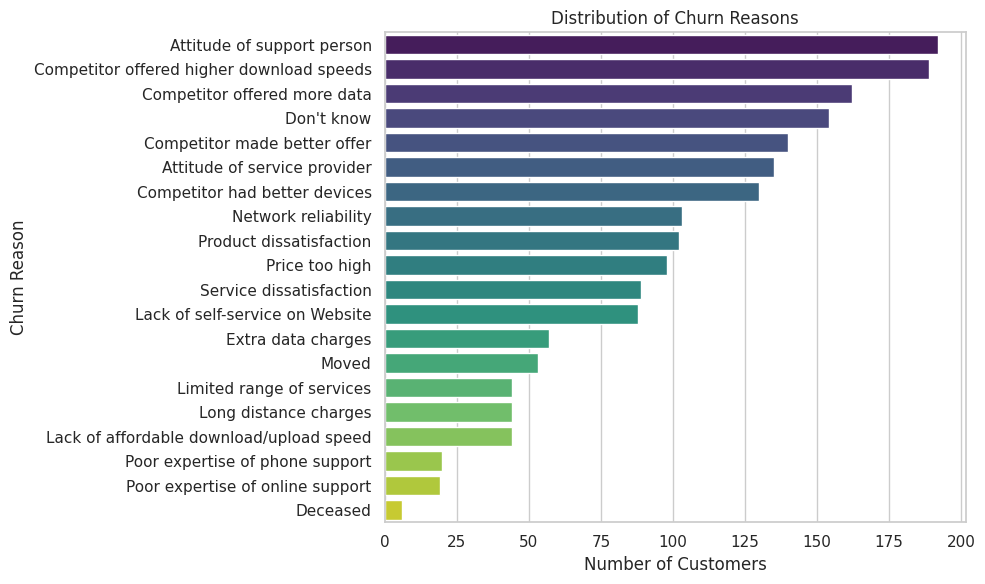

In [62]:
def churn_reason_distribution(df):
    """
    Plots the distribution of churn reasons.

    Parameters:
    df (pd.DataFrame): The DataFrame containing churn data.
    """
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y='Churn Reason', order=df['Churn Reason'].value_counts().index, palette='viridis')
    plt.title('Distribution of Churn Reasons')
    plt.xlabel('Number of Customers')
    plt.ylabel('Churn Reason')
    plt.tight_layout()
    plt.show()

def top_churn_reasons(df, top_n=10):
    """
    Returns the top N churn reasons.

    Parameters:
    df (pd.DataFrame): The DataFrame containing churn data.
    top_n (int): Number of top reasons to return.

    Returns:
    pd.Series: Top N churn reasons.
    """
    top_reasons = df['Churn Reason'].value_counts().head(top_n)
    print(f"Top {top_n} Churn Reasons:")
    print(top_reasons)
    return top_reasons

# Display top 10 churn reasons
top_reasons = top_churn_reasons(df, top_n=10)

# Plot the distribution
churn_reason_distribution(df)

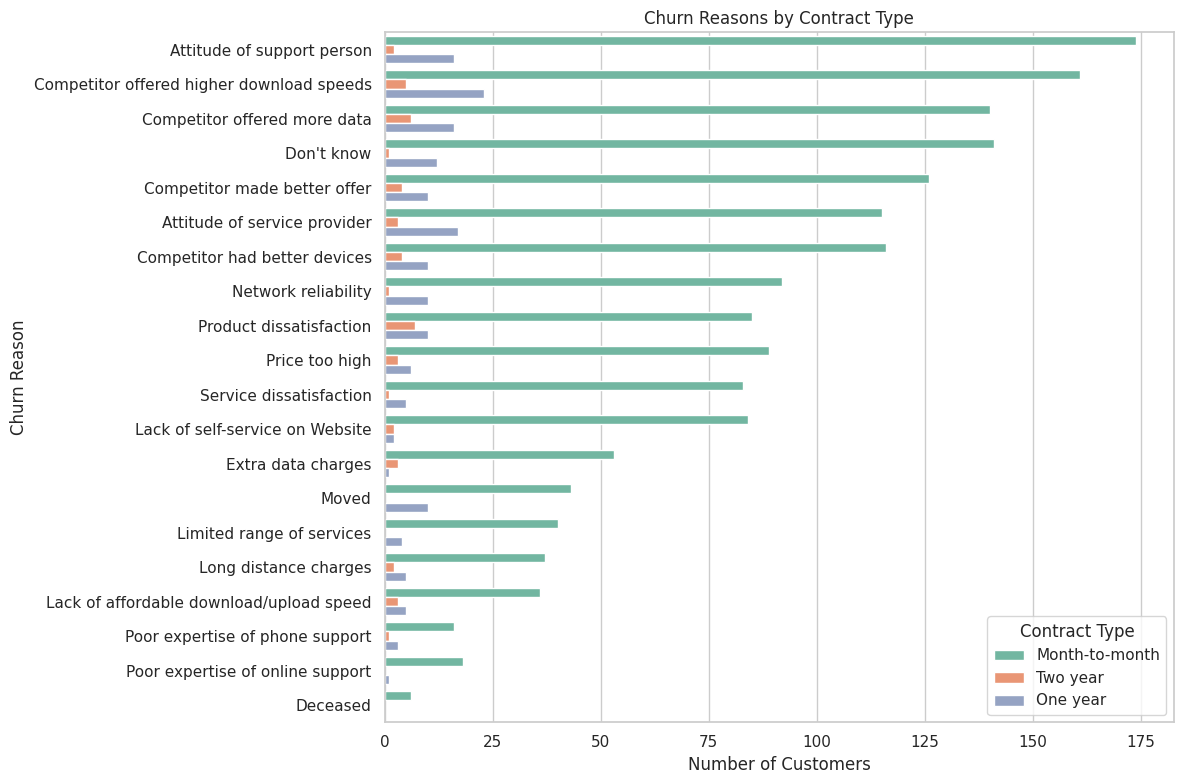

In [63]:
def churn_reason_by_contract(df):
    """
    Plots churn reasons segmented by contract type.

    Parameters:
    df (pd.DataFrame): The DataFrame containing churn data.
    """
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, y='Churn Reason', hue='Contract', palette='Set2', order=df['Churn Reason'].value_counts().index)
    plt.title('Churn Reasons by Contract Type')
    plt.xlabel('Number of Customers')
    plt.ylabel('Churn Reason')
    plt.legend(title='Contract Type')
    plt.tight_layout()
    plt.show()

churn_reason_by_contract(df)

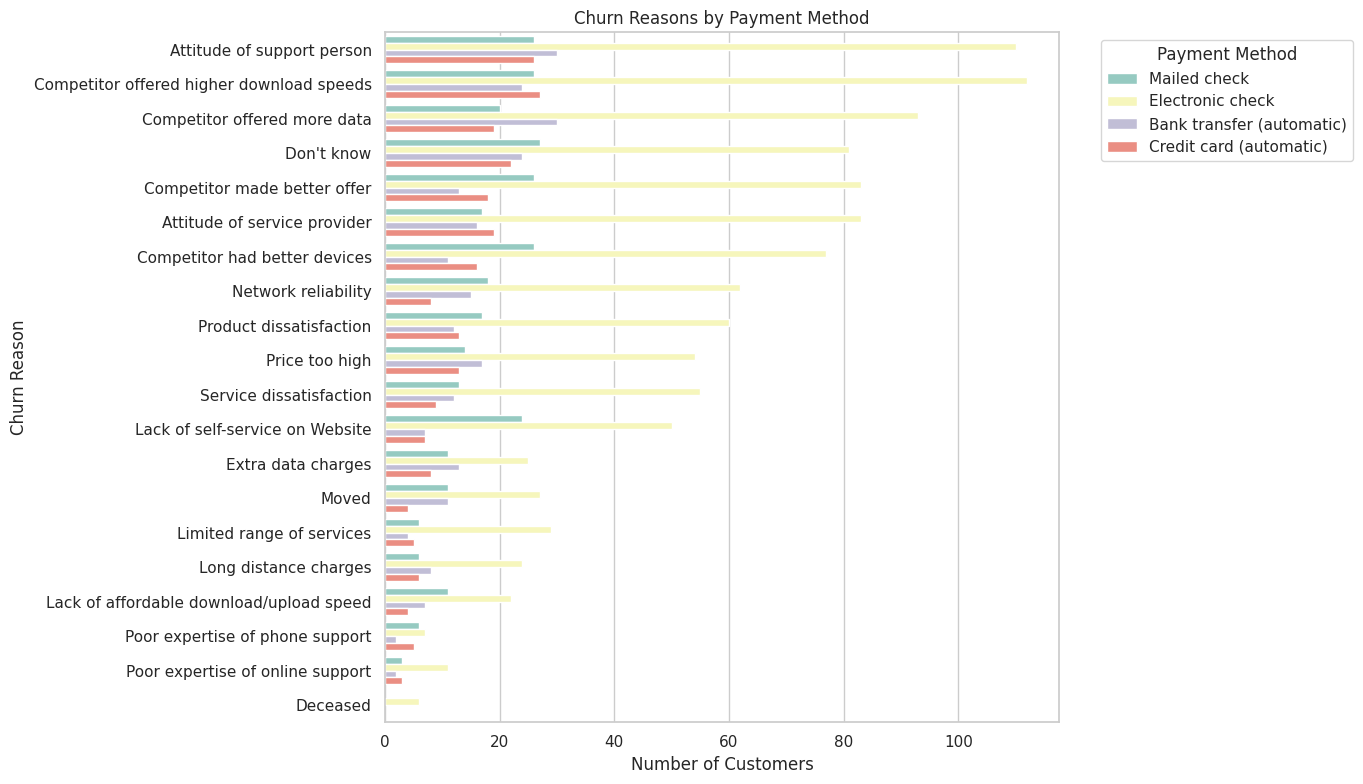

In [64]:
def churn_reason_by_payment_method(df):
    """
    Plots churn reasons segmented by payment method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing churn data.
    """
    plt.figure(figsize=(14,8))
    sns.countplot(data=df, y='Churn Reason', hue='Payment Method', palette='Set3', order=df['Churn Reason'].value_counts().index)
    plt.title('Churn Reasons by Payment Method')
    plt.xlabel('Number of Customers')
    plt.ylabel('Churn Reason')
    plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

churn_reason_by_payment_method(df)

In [65]:
# Install wordcloud if not already installed
!pip install wordcloud

from wordcloud import WordCloud

def churn_reason_wordcloud(df):
    """
    Generates a word cloud of churn reasons.

    Parameters:
    df (pd.DataFrame): The DataFrame containing churn data.
    """
    text = " ".join(reason.lower() for reason in df['Churn Reason'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(15,7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Churn Reasons', fontsize=20)
    plt.show()

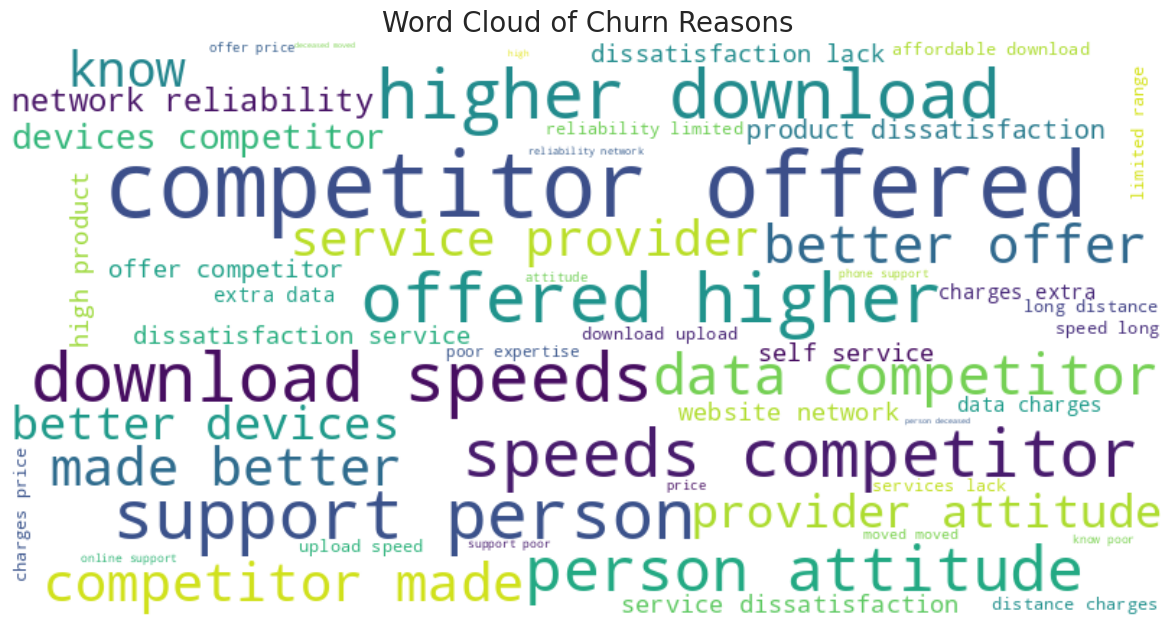

In [66]:
churn_reason_wordcloud(df)